In [1]:
import pandas as pd

df = pd.read_csv("../data/togo-dapaong_qc.csv") 
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [2]:
df.describe()
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [3]:
# Compute Z-scores for numeric columns
from scipy import stats
import numpy as np

numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[numeric_cols]))

df_clean = df[(z_scores < 3).all(axis=1)].copy()


In [4]:
for col in numeric_cols:
    df_clean.loc[:, col] = df_clean[col].fillna(df_clean[col].median())

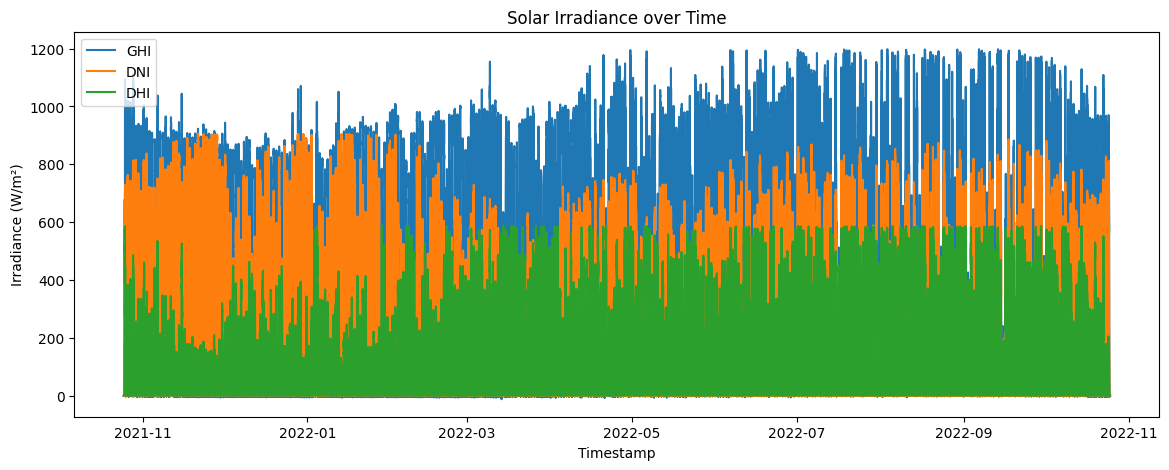

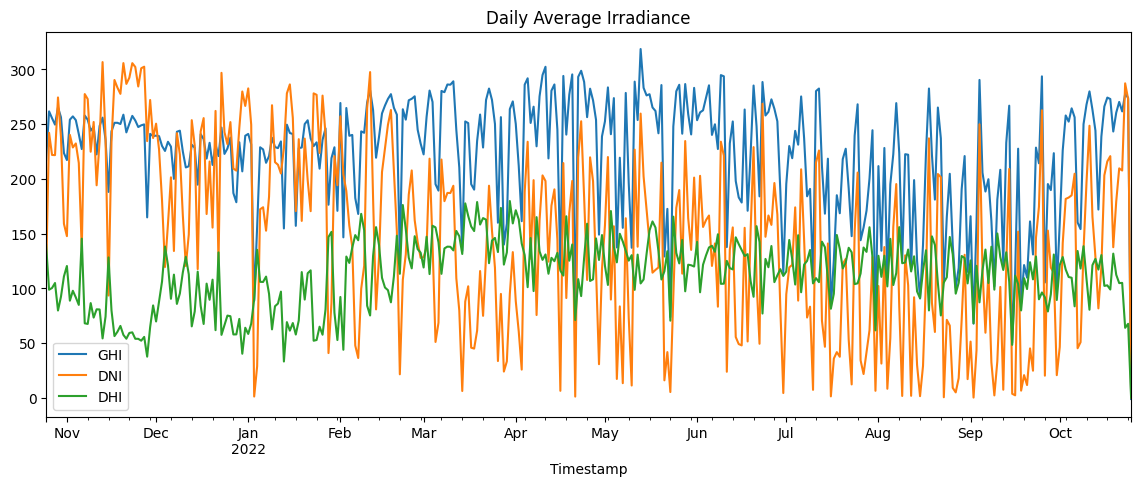

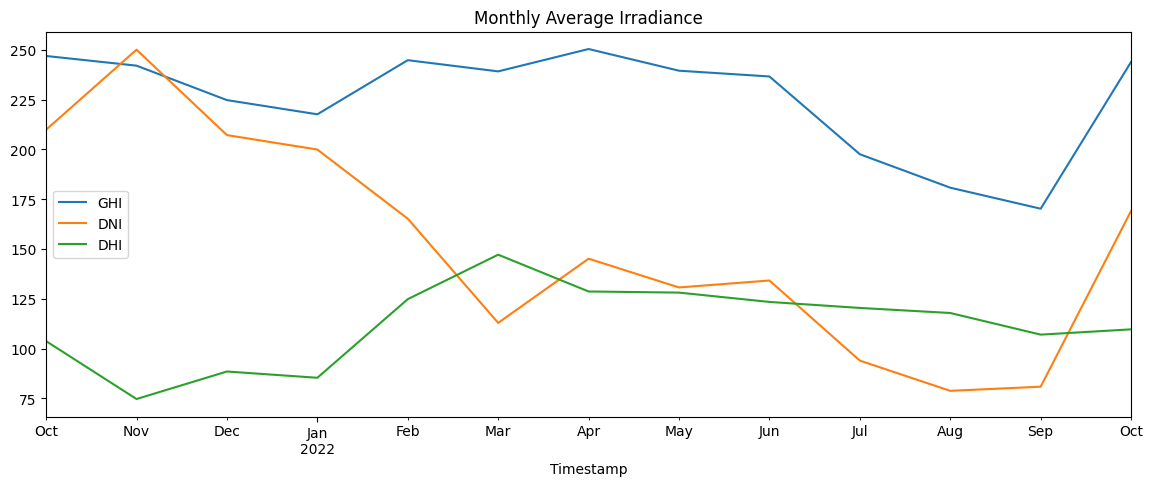

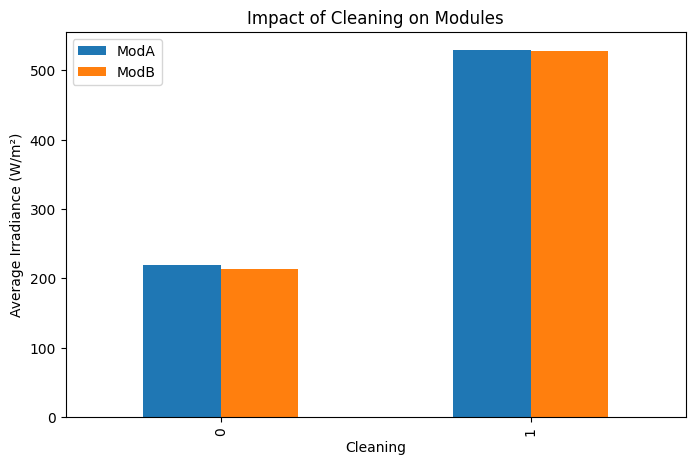

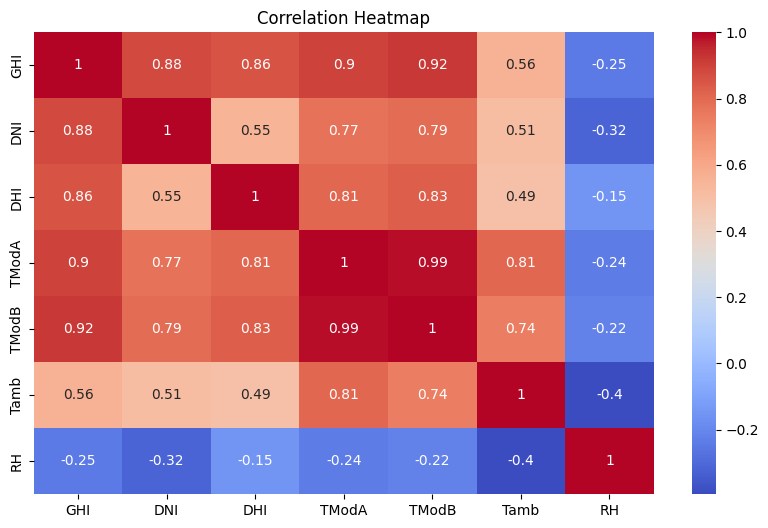

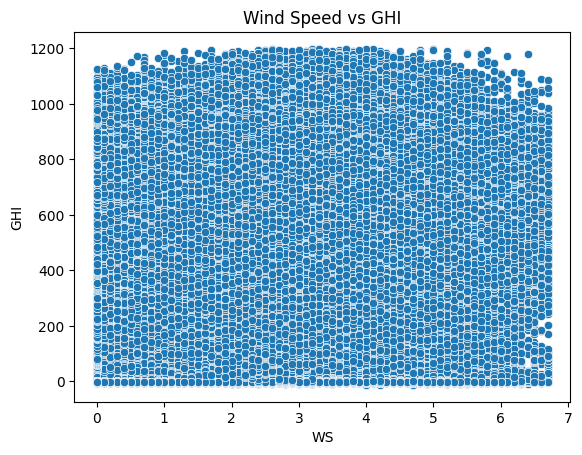

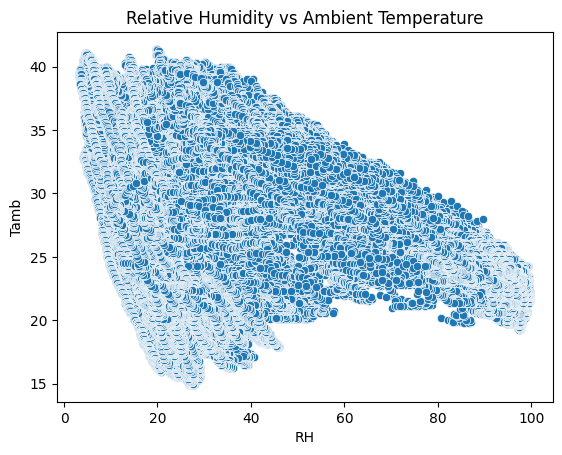

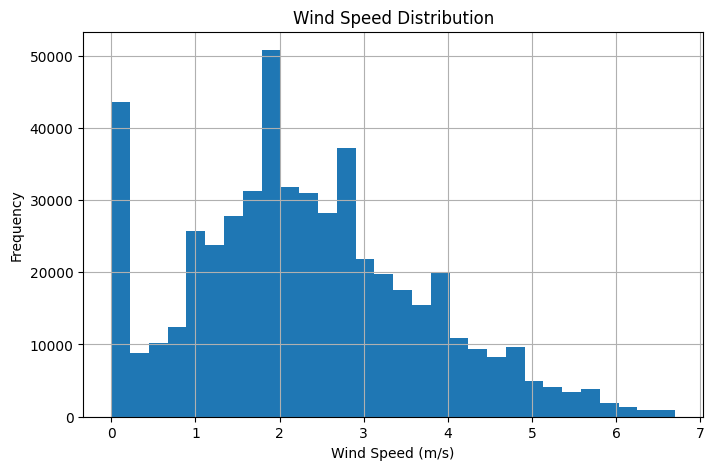

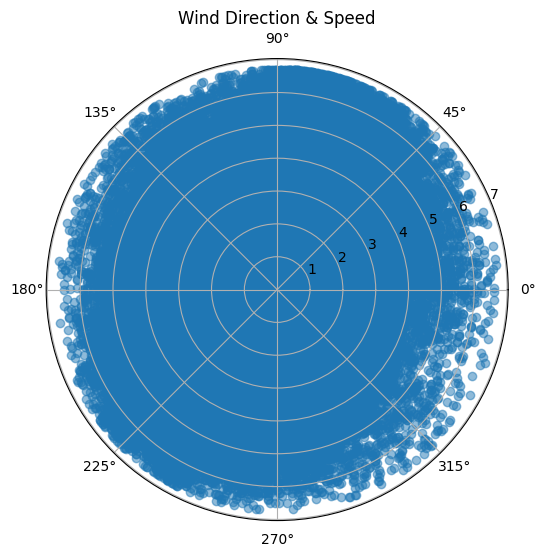

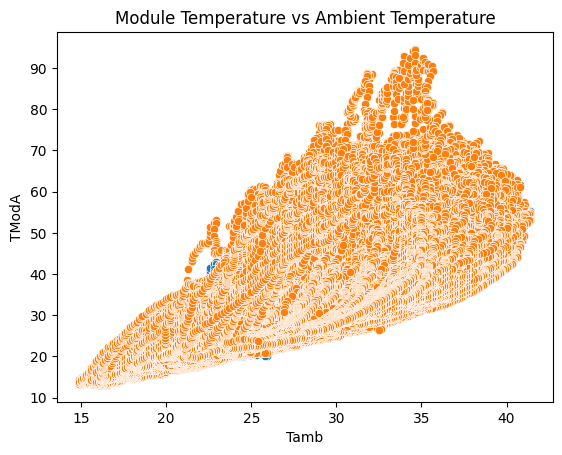

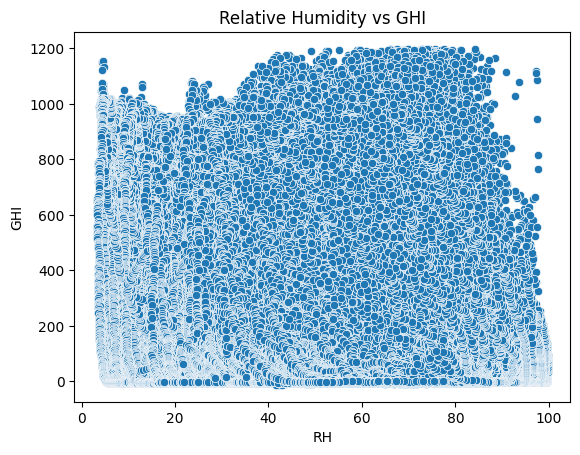

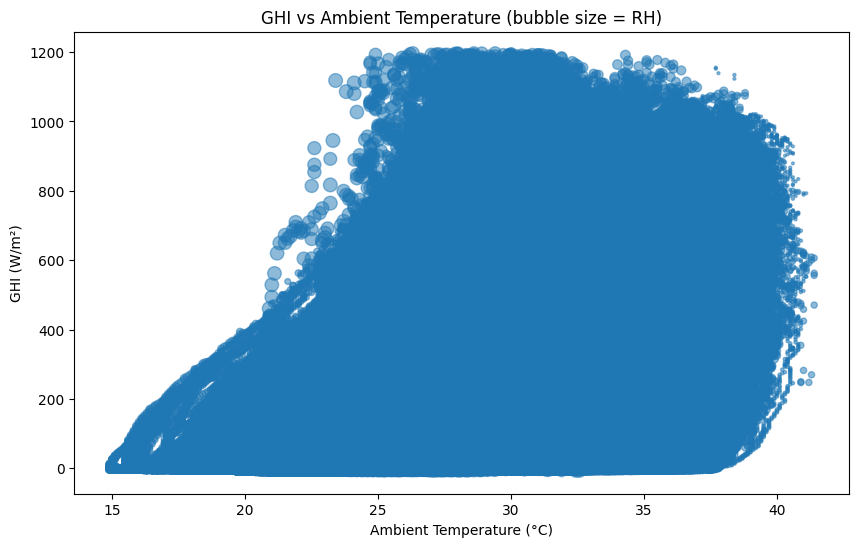

In [5]:
#8 time series analysis
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

plt.figure(figsize=(14,5))
plt.plot(df_clean.index, df_clean['GHI'], label='GHI')
plt.plot(df_clean.index, df_clean['DNI'], label='DNI')
plt.plot(df_clean.index, df_clean['DHI'], label='DHI')
plt.title("Solar Irradiance over Time")
plt.xlabel("Timestamp")
plt.ylabel("Irradiance (W/m²)")
plt.legend()
plt.show()

# Daily mean
daily_mean = df_clean.resample('D').mean()
daily_mean[['GHI','DNI','DHI']].plot(figsize=(14,5), title="Daily Average Irradiance")
plt.show()

# Monthly mean
monthly_mean = df_clean.resample('ME').mean()
monthly_mean[['GHI','DNI','DHI']].plot(figsize=(14,5), title="Monthly Average Irradiance")
plt.show()

# 9 cleaning impact on module performance
df_clean.groupby('Cleaning')[['ModA','ModB']].mean().plot(kind='bar', figsize=(8,5))
plt.title("Impact of Cleaning on Modules")
plt.ylabel("Average Irradiance (W/m²)")
plt.show()
#10 correlation and relationship analysis

plt.figure(figsize=(10,6))
sns.heatmap(df_clean[['GHI','DNI','DHI','TModA','TModB','Tamb','RH']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Wind vs GHI
sns.scatterplot(x='WS', y='GHI', data=df_clean)
plt.title("Wind Speed vs GHI")
plt.show()

# Relative Humidity vs Temperature
sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title("Relative Humidity vs Ambient Temperature")
plt.show()

# 11 Wind & Distribution Analysis
df_clean['WS'].hist(bins=30, figsize=(8,5))
plt.title("Wind Speed Distribution")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

# If you want a simple polar plot:

plt.figure(figsize=(6,6))
plt.subplot(111, polar=True)
theta = np.deg2rad(df_clean['WD'])
r = df_clean['WS']
plt.scatter(theta, r, alpha=0.5)
plt.title("Wind Direction & Speed")
plt.show()

# 12 Temperature Analysis

sns.scatterplot(x='Tamb', y='TModA', data=df_clean)
sns.scatterplot(x='Tamb', y='TModB', data=df_clean)
plt.title("Module Temperature vs Ambient Temperature")
plt.show()

sns.scatterplot(x='RH', y='GHI', data=df_clean)
plt.title("Relative Humidity vs GHI")
plt.show()

# Bubble Chart (Optional, Insightful)

plt.figure(figsize=(10,6))
plt.scatter(
    df_clean['Tamb'], df_clean['GHI'], 
    s=df_clean['RH'], alpha=0.5
)
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.title("GHI vs Ambient Temperature (bubble size = RH)")
plt.show()



In [6]:
df_clean.to_csv("../data/togo_clean.csv", index=False)
